In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import warnings
import torch

warnings.simplefilter('ignore')

torch.manual_seed(25) 

# 1. Data Processing & Feature Engineering

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("behrad3d/nasa-cmaps")

train1_path = path + "/CMaps/train_FD001.txt"
test1_path = path + "/CMaps/test_FD001.txt"
rul1_path = path + "/CMaps/RUL_FD001.txt"
data_train = pd.read_csv(train1_path, sep = " ", header=None)
data_test = pd.read_csv(test1_path, sep = " ", header=None)
data_rul = pd.read_csv(rul1_path)

train_copy = data_train
test_copy = data_test

In [3]:
print(path)

C:\Users\Yoni\.cache\kagglehub\datasets\behrad3d\nasa-cmaps\versions\1


In [4]:
data_train

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [5]:
data_test

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,NaN,NaN
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,NaN,NaN
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,NaN,NaN
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,NaN,NaN


In [6]:
data_rul

,112
0,98
1,69
2,82
3,91
4,93
...,...
94,137
95,82
96,59
97,117


In [7]:
data_train.drop(columns=[26, 27], inplace=True)
data_test.drop(columns=[26, 27], inplace=True)

In [8]:
columns_train = ['unit_ID','cycles','setting_1','setting_2','setting_3','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]
data_train.columns = columns_train
data_test.columns = columns_train
data_train.describe()

,unit_ID,cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [9]:
# Function to compute RUL for a single unit
def compute_rul(data):
    max_cycles = data['cycles'].max()
    data['RUL'] = max_cycles - data['cycles']
    return data

# Apply the RUL computation to each group
train = data_train.groupby('unit_ID', group_keys=False).apply(compute_rul)


In [10]:
train.head()

,unit_ID,cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [11]:
def calculate_rul(sequence_length, max_rul=None):
    """
    Calculate the Remaining Useful Life (RUL) for a given sequence length.
    
    Parameters:
        sequence_length (int): Total number of time steps in the sequence.
        max_rul (int, optional): Maximum cap for the RUL. If not specified, full RUL is returned.
    
    Returns:
        np.ndarray: Array containing RUL values for the sequence.
    """
    if max_rul is not None and sequence_length > max_rul:
        # Apply RUL cap
        capped_values = np.full(sequence_length - max_rul, max_rul)
        descending_values = np.arange(max_rul - 1, -1, -1)
        return np.concatenate([capped_values, descending_values])
    else:
        # Return standard descending RUL
        return np.arange(sequence_length - 1, -1, -1)


In [12]:
def generate_sliding_windows(data, labels=None, window_size=1, step=1):
    """
    Generate sliding windows from input data and optionally associated labels.
    
    Parameters:
        data (np.ndarray): Input data array with shape (num_samples, num_features).
        labels (np.ndarray, optional): Target labels corresponding to the input data. Defaults to None.
        window_size (int): Length of each sliding window. Defaults to 1.
        step (int): Step size for the sliding window. Defaults to 1.
    
    Returns:
        np.ndarray: Sliding windows of input data.
        np.ndarray (optional): Sliding windows of labels, if provided.
    """
    total_windows = (len(data) - window_size) // step + 1
    feature_count = data.shape[1]
    
    # Prepare output arrays for sliding windows
    windows = np.empty((total_windows, window_size, feature_count), dtype=np.float32)
    if labels is not None:
        label_windows = np.empty(total_windows, dtype=np.float32)
    
    for i in range(total_windows):
        start_idx = i * step
        end_idx = start_idx + window_size
        windows[i] = data[start_idx:end_idx]
        
        if labels is not None:
            label_windows[i] = labels[end_idx - 1]
    
    if labels is None:
        return windows
    else:
        return windows, label_windows


In [13]:
def prepare_test_windows(engine_data, window_size, step, max_windows=1):
    """
    Prepare sliding window batches from test data for a single engine.
    
    Parameters:
        engine_data (np.ndarray): Test data for a single engine, shape (num_samples, num_features).
        window_size (int): Length of each sliding window.
        step (int): Step size for the sliding window.
        max_windows (int, optional): Maximum number of windows to extract. Defaults to 1.
    
    Returns:
        np.ndarray: Batches of sliding windows from the test data.
        int: Actual number of windows extracted.
    """
    total_windows = (len(engine_data) - window_size) // step + 1

    if total_windows < max_windows:
        # Not enough windows; extract as many as possible
        required_length = (total_windows - 1) * step + window_size
        extracted_windows = generate_sliding_windows(
            data=engine_data[-required_length:], 
            labels=None, 
            window_size=window_size, 
            step=step
        )
        return extracted_windows, total_windows
    else:
        # Extract the desired number of windows
        required_length = (max_windows - 1) * step + window_size
        extracted_windows = generate_sliding_windows(
            data=engine_data[-required_length:], 
            labels=None, 
            window_size=window_size, 
            step=step
        )
        return extracted_windows, max_windows


In [14]:
test_data = pd.read_csv(test1_path, sep="\s+", header=None, names=columns_train)
true_rul = pd.read_csv(rul1_path, sep="\s+", header=None)

window_size = 30
step = 1
max_rul = 125
processed_train_data = []
processed_train_targets = []
max_windows = 5
processed_test_data = []
num_test_windows_list = []
# Remove columns with ~0 std. unlikely to effect results
columns_to_be_dropped = ['unit_ID', 'setting_1', 'setting_2', 'setting_3', 'T2', 'P2', 'P15', 'epr', 'farB', 'Nf_dmd', 'PCNfR_dmd']
train_data_first_column = data_train['unit_ID']
test_data_first_column = test_data['unit_ID']

In [15]:
scalar = StandardScaler()
train_data = scalar.fit_transform(data_train.drop(columns = columns_to_be_dropped))
test_data = scalar.transform(test_data.drop(columns=columns_to_be_dropped))

train_data = pd.DataFrame(data = np.c_[train_data_first_column, train_data])
test_data = pd.DataFrame(data = np.c_[test_data_first_column, test_data])

num_train_machines = len(train_data[0].unique())
num_test_machines = len(test_data[0].unique())

In [16]:
for i in np.arange(1, num_train_machines + 1):
    temp_train_data = train_data[train_data[0] == i].drop(columns = [0]).values

    if (len(temp_train_data) < window_size):
        print("Train engine {} doesn't have enough data for window_length of {}".format(i, window_size))
        raise AssertionError("Window length is larger than number of data points for some engines. "
                             "Try decreasing window length.")
    
    temp_train_targets = calculate_rul(sequence_length=temp_train_data.shape[0], max_rul=max_rul)

    data_for_a_machine, targets_for_a_machine = generate_sliding_windows(temp_train_data, temp_train_targets, window_size=window_size, step=step)
    processed_train_data.append(data_for_a_machine)
    processed_train_targets.append(targets_for_a_machine)

processed_train_data = np.concatenate(processed_train_data)
processed_train_targets = np.concatenate(processed_train_targets)


In [17]:
for i in np.arange(1, num_test_machines + 1):
    temp_test_data = test_data[test_data[0] == i].drop(columns = [0]).values
    
    # Determine whether it is possible to extract test data with the specified window length.
    if (len(temp_test_data) < window_size):
        print("Test engine {} doesn't have enough data for window_length of {}".format(i, window_size))
        raise AssertionError("Window length is larger than number of data points for some engines. "
                             "Try decreasing window length.")
    
    # Prepare test data

    test_data_for_an_engine, num_windows = prepare_test_windows(temp_test_data, window_size=window_size, step = step,
                                                              max_windows = max_windows)
    
    processed_test_data.append(test_data_for_an_engine)
    num_test_windows_list.append(num_windows)

processed_test_data = np.concatenate(processed_test_data)
true_rul = true_rul[0].values

In [18]:
print("Processed trianing data shape: ", processed_train_data.shape)
print("Processed training ruls shape: ", processed_train_targets.shape)
print("Processed test data shape: ", processed_test_data.shape)
print("True RUL shape: ", true_rul.shape)


Processed trianing data shape:  (17731, 30, 15)
Processed training ruls shape:  (17731,)
Processed test data shape:  (497, 30, 15)
True RUL shape:  (100,)


In [19]:
X_train, X_val, y_train, y_val = train_test_split(processed_train_data, processed_train_targets, test_size = 0.2, random_state = 83)

print("Processed train data shape: ", X_train.shape)
print("Processed validation data shape: ", X_val.shape)
print("Processed train targets shape: ", y_train.shape)
print("Processed validation targets shape: ", y_val.shape)

Processed train data shape:  (14184, 30, 15)
Processed validation data shape:  (3547, 30, 15)
Processed train targets shape:  (14184,)
Processed validation targets shape:  (3547,)


# 2. RUL Prediction Model

### LSTM Model

In [20]:
import torch
import torch.nn as nn


# Define the PyTorch model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(LSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_sizes[0], batch_first=True, num_layers=2)
        self.lstm2 = nn.LSTM(hidden_sizes[0], hidden_sizes[1], batch_first=True, num_layers=2)
        self.lstm3 = nn.LSTM(hidden_sizes[1], hidden_sizes[2], batch_first=True, num_layers=2)
        self.fc1 = nn.Linear(hidden_sizes[2], 96)
        self.fc2 = nn.Linear(96, 128)
        self.fc3 = nn.Linear(128, output_size)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x, (hn, _) = self.lstm3(x)
        x = self.relu(self.fc1(hn[-1]))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [21]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

# Assuming `processed_train_data` and `processed_train_targets` are NumPy arrays
processed_train_data = torch.tensor(processed_train_data, dtype=torch.float32)
processed_train_targets = torch.tensor(processed_train_targets, dtype=torch.float32)

# Splitting the dataset
dataset = TensorDataset(processed_train_data, processed_train_targets)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)

print("Processed train data shape: ", processed_train_data[:train_size].shape)
print("Processed validation data shape: ", processed_train_data[train_size:].shape)
print("Processed train targets shape: ", processed_train_targets[:train_size].shape)
print("Processed validation targets shape: ", processed_train_targets[train_size:].shape)



# Instantiate the model
input_size = 15
# hidden_sizes = [128, 64, 32]
hidden_sizes = [128, 64, 32]
epochs = 200
output_size = 1
model = LSTMModel(input_size, hidden_sizes, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)

# Training loop

for epoch in range(epochs):
    model.train()
    # scheduler(epoch, optimizer)
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred.squeeze(), y_batch)
        loss.backward()
        optimizer.step()
    scheduler.step()
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_pred = model(X_batch)
            val_loss += criterion(y_pred.squeeze(), y_batch).item()
    val_loss /= len(val_loader)
    
    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}")


Processed train data shape:  torch.Size([14184, 30, 15])
Processed validation data shape:  torch.Size([3547, 30, 15])
Processed train targets shape:  torch.Size([14184])
Processed validation targets shape:  torch.Size([3547])
Epoch 1/200, Train Loss: 1862.4309, Validation Loss: 1744.8803
Epoch 2/200, Train Loss: 1381.4171, Validation Loss: 1747.5278
Epoch 3/200, Train Loss: 1802.2072, Validation Loss: 1744.2653
Epoch 4/200, Train Loss: 1955.1978, Validation Loss: 1744.4288
Epoch 5/200, Train Loss: 1925.3789, Validation Loss: 1746.3486
Epoch 6/200, Train Loss: 1779.0614, Validation Loss: 1744.8160
Epoch 7/200, Train Loss: 1668.9772, Validation Loss: 1746.7753
Epoch 8/200, Train Loss: 1702.8420, Validation Loss: 1747.2273
Epoch 9/200, Train Loss: 457.4176, Validation Loss: 495.7952
Epoch 10/200, Train Loss: 265.4474, Validation Loss: 264.3211
Epoch 11/200, Train Loss: 176.2064, Validation Loss: 141.9160
Epoch 12/200, Train Loss: 158.9496, Validation Loss: 144.6492
Epoch 13/200, Train Los

In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error
import torch

# Assuming 'model' is the trained PyTorch model and 'processed_test_data' is the prepared test data as a PyTorch tensor
# Also assuming num_test_windows_list and true_rul are available
processed_test_data = torch.tensor(processed_test_data, dtype=torch.float32)
# Convert test data to a DataLoader
test_loader = torch.utils.data.DataLoader(processed_test_data, batch_size=128, shuffle=False)

# Move model to evaluation mode
model.eval()

# Collect predictions
rul_pred = []
with torch.no_grad():
    for batch in test_loader:
        # batch = batch.to("cuda" if torch.cuda.is_available() else "cpu")
        output = model(batch).cpu().numpy().reshape(-1)
        rul_pred.extend(output)

# Split predictions based on the number of windows for each engine
preds_for_each_engine = np.split(rul_pred, np.cumsum(num_test_windows_list)[:-1])

# Compute the mean prediction for each engine, weighted by the number of windows
mean_pred_for_each_engine = [
    np.average(ruls_for_each_engine, weights=np.repeat(1 / num_windows, num_windows))
    for ruls_for_each_engine, num_windows in zip(preds_for_each_engine, num_test_windows_list)
]

# Compute RMSE
RMSE = np.sqrt(mean_squared_error(true_rul, mean_pred_for_each_engine))
print("RMSE:", RMSE)


RMSE: 18.570271496245805


In [23]:
orinial_RMSE = RMSE
indices_of_last_examples = np.cumsum(num_test_windows_list) - 1
preds_for_last_example = np.concatenate(preds_for_each_engine)[indices_of_last_examples]
LSTM_RMSE = np.sqrt(mean_squared_error(true_rul, preds_for_last_example))
print("RMSE LSTM", LSTM_RMSE)

RMSE LSTM 19.397915191317114


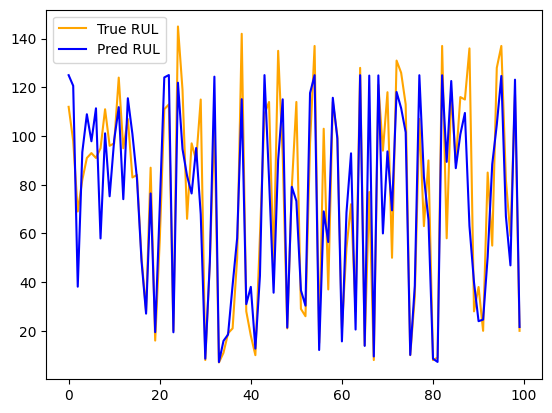

In [24]:
plt.plot(true_rul, label = "True RUL", color = "orange")
plt.plot(preds_for_last_example, label= "Pred RUL", color = "blue")
plt.legend()
plt.show()

In [25]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Define parameters
window_length = 30
shift = 1
columns_to_be_dropped = ['unit_ID', 'setting_1', 'setting_2', 'setting_3', 'T2', 'P2', 'P15', 'epr', 'farB', 'Nf_dmd', 'PCNfR_dmd']

# Preprocess test data
test_data_first_column = data_test['unit_ID']
test_data = scalar.transform(data_test.drop(columns=columns_to_be_dropped))  # Normalize test data
test_data = pd.DataFrame(data=np.c_[test_data_first_column, test_data])

# Prepare test data sequences
processed_test_data = []
num_test_windows_list = []
for unit_id in np.unique(test_data[0]):
    temp_test_data = test_data[test_data[0] == unit_id].drop(columns=[0]).values
    if len(temp_test_data) < window_length:
        print(f"Test engine {unit_id} doesn't have enough data for window_length of {window_length}")
        continue
    test_data_for_engine, num_windows = prepare_test_windows(temp_test_data, window_size=window_size, step=step)
    processed_test_data.append(test_data_for_engine)
    num_test_windows_list.append(num_windows)

processed_test_data = np.concatenate(processed_test_data)  # Combine all engines' data
print(f"Processed test data shape: {processed_test_data.shape}")

# Convert to PyTorch tensors
X_test_tensor = torch.tensor(processed_test_data, dtype=torch.float32)

# Create DataLoader
test_loader = DataLoader(TensorDataset(X_test_tensor), batch_size=1, shuffle=False)


Processed test data shape: (100, 30, 15)


### LSTM Ensemble

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt


# Training function for a single model
def train_model(model, train_loader, val_loader, epochs=epochs, lr=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)

    
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred.squeeze(), y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        scheduler.step()
        train_loss /= len(train_loader)
        
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                y_pred = model(X_batch)
                val_loss += criterion(y_pred.squeeze(), y_batch).item()
        val_loss /= len(val_loader)
        
        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
    
    return model

# Ensemble of models
def train_ensemble(train_loader, val_loader, input_size, hidden_sizes, output_size, n_models=5, epochs=epochs):
    models = []
    for i in range(n_models):
        print(f"Training model {i + 1}/{n_models}")
        model = LSTMModel(input_size, hidden_sizes, output_size)
        trained_model = train_model(model, train_loader, val_loader, epochs)
        models.append(trained_model)
    return models

# Generate predictions and uncertainty
def predict_ensemble(models, test_loader):
    all_predictions = []
    for model in models:
        model.eval()
        predictions = []
        with torch.no_grad():
            for X_batch in test_loader:
                # Extract the tensor from the tuple
                X_batch = X_batch[0]
                preds = model(X_batch).squeeze().cpu().numpy()
                # Wrap scalar predictions in a 1D array
                predictions.append(np.array([preds]))
        # Concatenate predictions into a single array for this model
        all_predictions.append(np.concatenate(predictions))
    
    # Convert to numpy array: shape (n_models, n_samples)
    all_predictions = np.array(all_predictions)
    mean_prediction = np.mean(all_predictions, axis=0)
    std_prediction = np.std(all_predictions, axis=0)
    
    return mean_prediction, std_prediction


# Plot results
def plot_results(true_rul, mean_prediction, std_prediction):
    x = np.arange(len(true_rul))
    
    plt.figure(figsize=(20, 8))
    plt.plot(x, true_rul, label="True RUL", color="blue")
    plt.plot(x, mean_prediction, label="Mean Prediction", color="red")
    plt.fill_between(
        x, 
        mean_prediction - std_prediction, 
        mean_prediction + std_prediction, 
        color="orange", 
        alpha=0.3, 
        label="Uncertainty (±1 STD)"
    )
    plt.xlabel("Sample Index")
    plt.ylabel("RUL")
    plt.legend()
    plt.title("Ensemble Predictions with Uncertainty")
    plt.show()

# Example usage
# input_size = next(iter(train_loader))[0].shape[2]

hidden_sizes = [128, 64, 32]
output_size = 1

# Create DataLoaders
# train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
# val_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)
# test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)




In [27]:
# Train ensemble
n_models = 5
ensemble_models = train_ensemble(train_loader, val_loader, input_size, hidden_sizes, output_size, n_models)


Training model 1/5
Epoch 1/200, Train Loss: 4464.1034, Validation Loss: 1744.8858
Epoch 2/200, Train Loss: 1749.5586, Validation Loss: 1744.2018
Epoch 3/200, Train Loss: 1751.1823, Validation Loss: 1745.1214
Epoch 4/200, Train Loss: 1749.5957, Validation Loss: 1744.0793
Epoch 5/200, Train Loss: 1750.2161, Validation Loss: 1744.0676
Epoch 6/200, Train Loss: 1750.0171, Validation Loss: 1744.3067
Epoch 7/200, Train Loss: 1749.3641, Validation Loss: 1744.8232
Epoch 8/200, Train Loss: 1750.6796, Validation Loss: 1749.2697
Epoch 9/200, Train Loss: 1750.8560, Validation Loss: 1743.9667
Epoch 10/200, Train Loss: 1749.1667, Validation Loss: 1743.9443
Epoch 11/200, Train Loss: 1749.9484, Validation Loss: 1744.9636
Epoch 12/200, Train Loss: 1750.4469, Validation Loss: 1741.9481
Epoch 13/200, Train Loss: 876.9130, Validation Loss: 404.3666
Epoch 14/200, Train Loss: 253.1174, Validation Loss: 178.5951
Epoch 15/200, Train Loss: 151.3084, Validation Loss: 145.5150
Epoch 16/200, Train Loss: 129.2536, 

In [28]:
# Assuming true_rul contains the true RUL values for the test set
true_rul_tensor = torch.tensor(true_rul, dtype=torch.float32)  # Convert true RUL to tensor

# Create TensorDataset with both inputs and targets
test_dataset = TensorDataset(X_test_tensor, true_rul_tensor)

# Create DataLoader
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)


In [29]:
import numpy as np
from sklearn.metrics import mean_squared_error
import torch

# Assuming true_rul, test_loader, num_test_windows_list, and ensemble_models are available
true_rul_tensor = torch.tensor(true_rul, dtype=torch.float32)  # Convert true RUL to tensor

# Move ensemble models to evaluation mode and collect predictions
ensemble_predictions = []

for model in ensemble_models:
    model.eval()
    model_preds = []
    with torch.no_grad():
        for X_batch, _ in test_loader:  # Extract test inputs (ignore labels)
            X_batch = X_batch
            output = model(X_batch).numpy().reshape(-1)
            # output = model(X_batch).cpu().numpy().reshape(-1)
            model_preds.extend(output)
    ensemble_predictions.append(model_preds)

# Convert to numpy array (shape: n_models, n_samples)
ensemble_predictions = np.array(ensemble_predictions)

# Average predictions across the ensemble
rul_pred = ensemble_predictions.mean(axis=0)

# Split predictions based on the number of windows for each engine
preds_for_each_engine = np.split(rul_pred, np.cumsum(num_test_windows_list)[:-1])

# Compute the mean prediction for each engine, weighted by the number of windows
mean_pred_for_each_engine = [
    np.average(ruls_for_each_engine, weights=np.repeat(1 / num_windows, num_windows))
    for ruls_for_each_engine, num_windows in zip(preds_for_each_engine, num_test_windows_list)
]

# Compute RMSE
RMSE = np.sqrt(mean_squared_error(true_rul, mean_pred_for_each_engine))
print("RMSE (Ensemble Mean Prediction):", RMSE)

# Compute RMSE using the last prediction from each engine
indices_of_last_examples = np.cumsum(num_test_windows_list) - 1
preds_for_last_example = np.concatenate(preds_for_each_engine)[indices_of_last_examples]
ensemble_RMSE_last = np.sqrt(mean_squared_error(true_rul, preds_for_last_example))
print("RMSE Ensemble:", ensemble_RMSE_last)


RMSE (Ensemble Mean Prediction): 17.288431096555055
RMSE Ensemble: 17.288430569110915


In [30]:
# Generate predictions and uncertainty
ensemble_mean_pred, ensemble_std_pred = predict_ensemble(ensemble_models, test_loader)

# Access true RUL from the dataset
true_rul = true_rul_tensor.numpy()

# Plot results


### LSTM MultiSwag

In [31]:
import torch.optim.swa_utils as swa_utils

# SWAG training function
def train_swag_model(model, train_loader, val_loader, epochs=epochs, lr=0.001, swa_start=int(epochs*0.75)):
    """
    Train a model using SWAG (Stochastic Weight Averaging Gaussian).

    Args:
        model: PyTorch model to train.
        train_loader: DataLoader for training data.
        val_loader: DataLoader for validation data.
        epochs: Total number of epochs to train.
        lr: Learning rate.
        swa_start: Epoch to start stochastic weight averaging.

    Returns:
        swa_model: SWAG model.
        swa_optimizer: SWAG optimizer.
    """
    # Initialize standard optimizer
    base_optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # Initialize SWA optimizer
    swa_model = swa_utils.AveragedModel(model)
    swa_scheduler = optim.lr_scheduler.CosineAnnealingLR(base_optimizer, T_max=epochs)

    criterion = nn.MSELoss()
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            base_optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred.squeeze(), y_batch)
            loss.backward()
            base_optimizer.step()
            train_loss += loss.item()
        
        train_loss /= len(train_loader)
        
        # Apply SWA updates
        if epoch >= swa_start:
            swa_model.update_parameters(model)
            swa_scheduler.step()
        
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                y_pred = model(X_batch)
                val_loss += criterion(y_pred.squeeze(), y_batch).item()
        val_loss /= len(val_loader)
        
        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
    
    # Update SWA BatchNorm statistics
    swa_utils.update_bn(train_loader, swa_model)
    return swa_model, base_optimizer


In [32]:
def train_multi_swag(train_loader, val_loader, input_size, hidden_sizes, output_size, n_models=5, epochs=epochs, lr=0.001, swa_start=int(0.75*epochs)):
    """
    Train multiple SWAG models for MultiSWAG.

    Args:
        train_loader: DataLoader for training data.
        val_loader: DataLoader for validation data.
        input_size: Input feature size.
        hidden_sizes: List of hidden layer sizes.
        output_size: Output size.
        n_models: Number of SWAG models to train.
        epochs: Number of epochs for training.
        lr: Learning rate.
        swa_start: Epoch to start stochastic weight averaging.

    Returns:
        models: List of trained SWAG models.
    """
    models = []
    for i in range(n_models):
        print(f"Training SWAG model {i + 1}/{n_models}")
        model = LSTMModel(input_size, hidden_sizes, output_size)
        swa_model, _ = train_swag_model(model, train_loader, val_loader, epochs, lr, swa_start)
        models.append(swa_model)
    return models

# Generate predictions for MultiSWAG
def predict_multi_swag(models, test_loader):
    all_predictions = []
    for model in models:
        model.eval()
        predictions = []
        with torch.no_grad():
            for X_batch in test_loader:
                X_batch = X_batch[0]  # Extract tensor from tuple
                preds = model(X_batch).squeeze().cpu().numpy()
                predictions.append(np.array([preds]))
        all_predictions.append(np.concatenate(predictions))
    
    # Convert to numpy array: shape (n_models, n_samples)
    all_predictions = np.array(all_predictions)
    mean_prediction = np.mean(all_predictions, axis=0)
    std_prediction = np.std(all_predictions, axis=0)
    
    return mean_prediction, std_prediction


In [33]:
multi_swag_models = train_multi_swag(train_loader, val_loader, input_size, hidden_sizes, output_size, n_models=5)

Training SWAG model 1/5
Epoch 1/200, Train Loss: 4553.5480, Validation Loss: 1744.9499
Epoch 2/200, Train Loss: 1751.4276, Validation Loss: 1743.8910
Epoch 3/200, Train Loss: 1750.1058, Validation Loss: 1744.2398
Epoch 4/200, Train Loss: 1750.3619, Validation Loss: 1754.8225
Epoch 5/200, Train Loss: 1750.0632, Validation Loss: 1749.8013
Epoch 6/200, Train Loss: 1753.3651, Validation Loss: 1754.5632
Epoch 7/200, Train Loss: 1749.3163, Validation Loss: 1744.2317
Epoch 8/200, Train Loss: 1753.8512, Validation Loss: 1743.9166
Epoch 9/200, Train Loss: 1748.4491, Validation Loss: 1746.4656
Epoch 10/200, Train Loss: 1751.1930, Validation Loss: 1745.9302
Epoch 11/200, Train Loss: 1751.2998, Validation Loss: 1743.8671
Epoch 12/200, Train Loss: 1750.2834, Validation Loss: 1749.0475
Epoch 13/200, Train Loss: 1750.8174, Validation Loss: 1744.2794
Epoch 14/200, Train Loss: 1749.6110, Validation Loss: 1746.0567
Epoch 15/200, Train Loss: 1753.0111, Validation Loss: 1762.1297
Epoch 16/200, Train Loss:

In [34]:
from sklearn.metrics import mean_squared_error
import numpy as np
import torch

# Assuming `true_rul`, `test_loader`, and `num_test_windows_list` are available

# Generate predictions using MultiSWAG models
multi_swag_mean_pred, multi_swag_std_pred = predict_multi_swag(multi_swag_models, test_loader)

# Split predictions based on the number of windows for each engine
preds_for_each_engine = np.split(multi_swag_mean_pred, np.cumsum(num_test_windows_list)[:-1])

# Compute the mean prediction for each engine, weighted by the number of windows
mean_pred_for_each_engine = [
    np.average(ruls_for_each_engine, weights=np.repeat(1 / num_windows, num_windows))
    for ruls_for_each_engine, num_windows in zip(preds_for_each_engine, num_test_windows_list)
]

# Compute RMSE using mean predictions
rmse_mean = np.sqrt(mean_squared_error(true_rul, mean_pred_for_each_engine))
print("RMSE (MultiSWAG Mean Prediction):", rmse_mean)

# Compute RMSE using the last prediction from each engine
indices_of_last_examples = np.cumsum(num_test_windows_list) - 1
preds_for_last_example = np.concatenate(preds_for_each_engine)[indices_of_last_examples]
MultiSwag_rmse_last = np.sqrt(mean_squared_error(true_rul, preds_for_last_example))
print("RMSE (MultiSWAG Last Predictions):", MultiSwag_rmse_last)


RMSE (MultiSWAG Mean Prediction): 17.890789607594268
RMSE (MultiSWAG Last Predictions): 17.890789607594268


# 3. Model Evaluation & Documentation

### LSTM Basic Ensemble

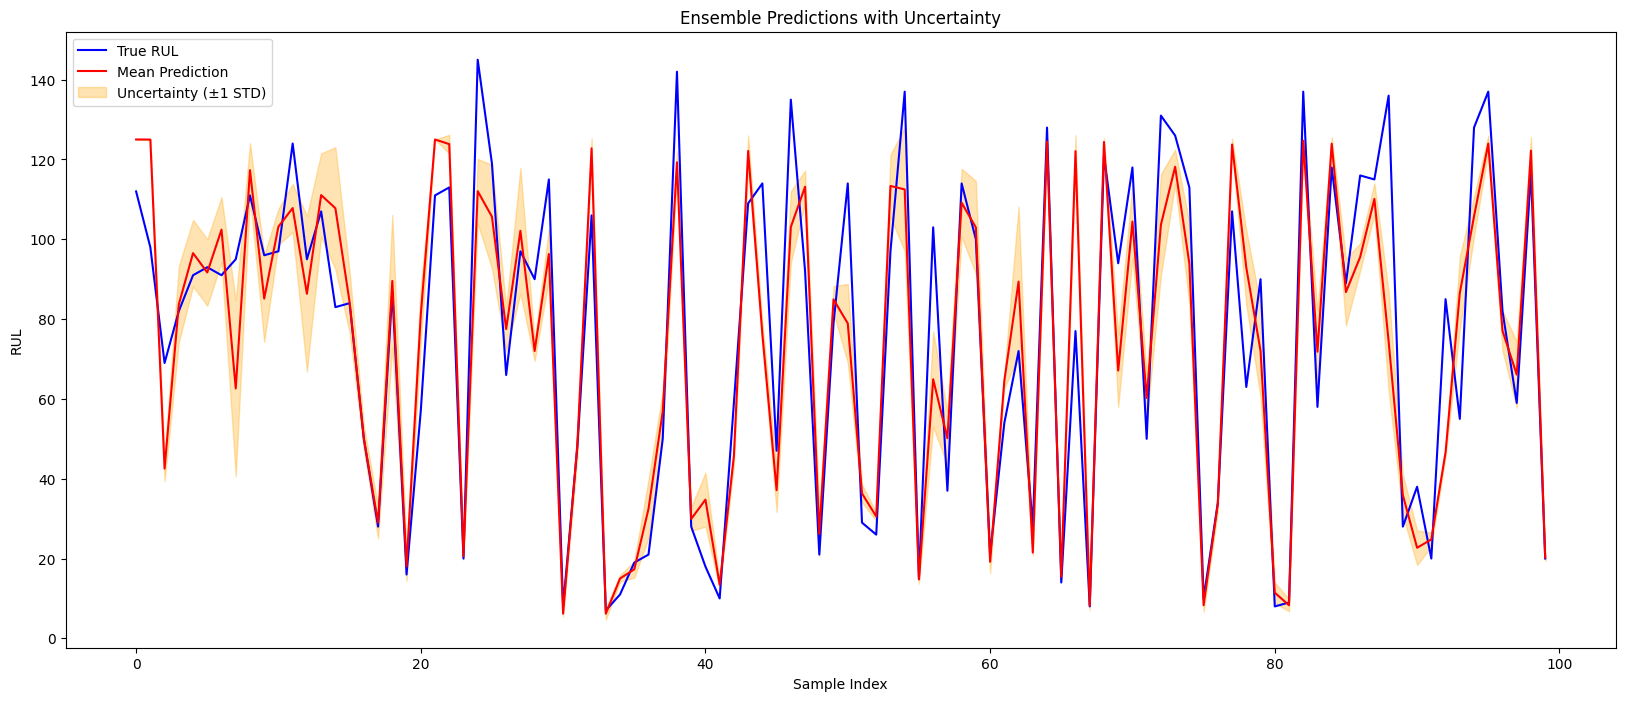

RMSE Ensemble: 17.288430569110915


In [35]:
plot_results(true_rul, ensemble_mean_pred, ensemble_std_pred)
print("RMSE Ensemble:", ensemble_RMSE_last)


### LSTM MultiSwag Ensemble

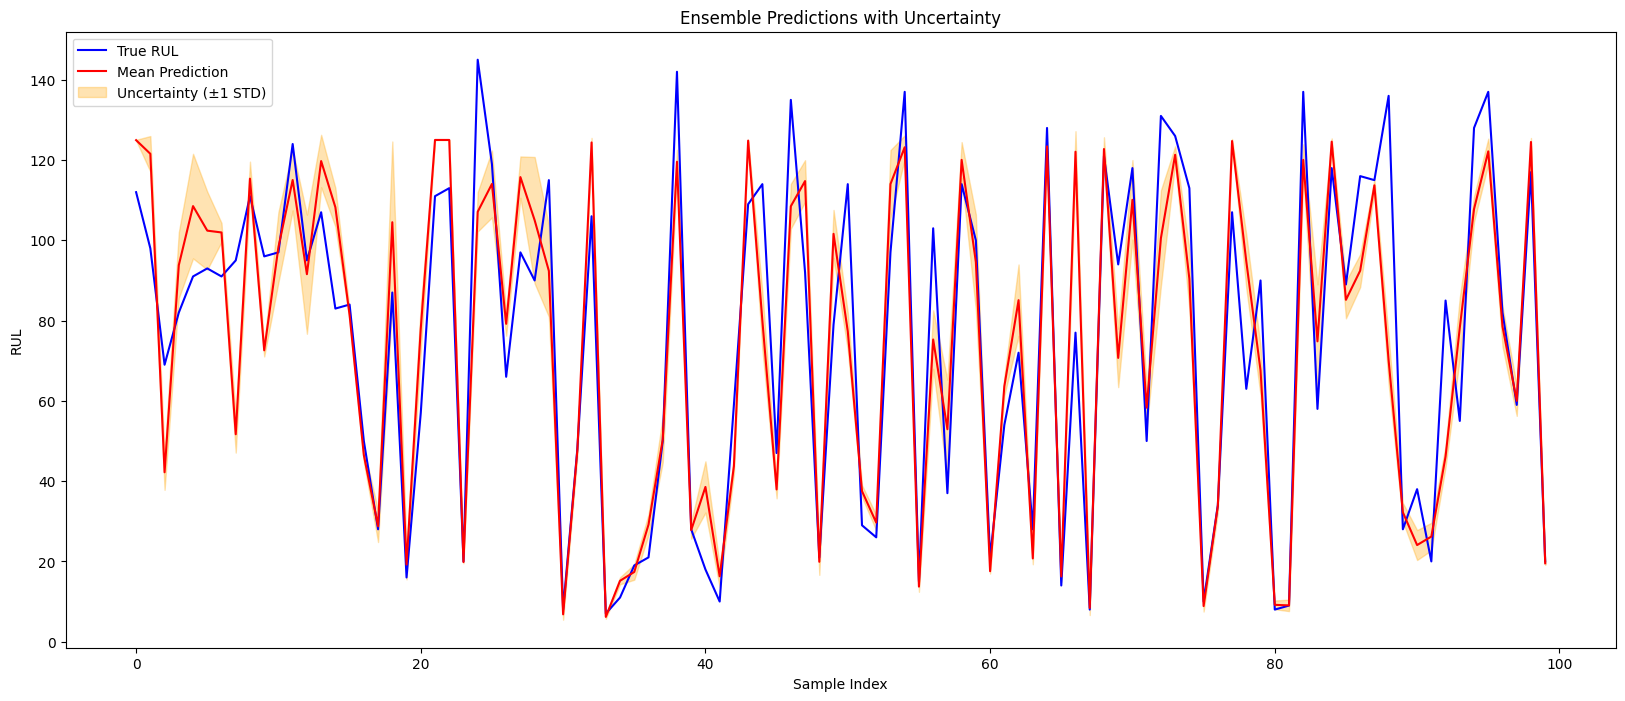

RMSE (MultiSWAG Last Predictions): 17.890789607594268


In [36]:
plot_results(true_rul, multi_swag_mean_pred, multi_swag_std_pred)
print("RMSE (MultiSWAG Last Predictions):", MultiSwag_rmse_last)


Model Selection:

I chose to use an LSTM due to its ability to remember long term relationships between data. We want to establish trends over a window of time that determines what the RUL for an engine would be. Understanding the long term interactions that cause degradation of engines seems to be a viable path to solving this problem

Feature Engineering:

I removed columns that had a 0 standard deviation in their values, which basically meant they were constant. Constant values should provide little to no predictive power and should not be considered. I created a RUL parameter initally, and also used a function to add a cap to the RUL. If the initially calculated RUL was over the maximum I set, then it would be reduced. Capping the RUL allows the model to learn faster since it removes outliers, reduces the variance in target values, and stabilizes the gradients. Having some overly large RUL values could skew results, drastically reducing the model's effectiveness. I also generated some features that tracked rate of change in column values, but found little difference in results from using them. Additionally, all useful columns were scaled to have a mean of 0 and standard deviation of 1, to help improve model performance.

Performance Metrics:

I calculated the RMSE for each models predictions. The results of the RUL prediciton model are visualized in the charts above. The blue line represents the true RUL values for the test sample, while the red line shows the mean predictions obtained from the ensemble of models. To asses the model's uncertainty, the shaded orange region indicated the ±1 standard deviation range aroudn the mean predictions. A narrow uncertainty band suggests high confidence, whereas wider bands indicate areas where the model is less certain. This visualization helps evaluate both accuracy and reliability of the model in predicting the remaining useful life.

Write Up


Approach Taken:
I implemented a single LSTM model to predict the Remaining Useful Life of engines. The LSTM was selected for its ability to model sequential dependencies in time-series data, capturing patterns of degradation effectively. Key steps included preprocessing the C-MAPSS datset, involving standardizing the input features and generating sliding windows of time-series data. The model was trained to predict the RUL of the last input sample for a given window, to leverage its ability to learn relationships over a period of time. The limitations with just one model were its ability to generate confidence intervals. To achieve this an LSTM ensemble of independently trained models was implemented. Averaging predictions from all models to generate a single ensemble output allows us to treat the output as a distribution, with a mean and variance. This lets us quantify ensemble uncertainty by calculating the standard deviation of predictions across models, providing ocnfidence intervals for RUL predictions.

I extended the ensemble approach by using Stochastic Weight Averaging Gaussian (SWAG) to create a MultiSWAG ensemble. SWAG incorperates uncertainty in the parameter space, by averaging parameters over training epochs. Similar to the regular ensemble, predictions from multiple SWAG models were combined to calculate the mean and standard deviation of results, and generate confidence intervals for quantifying uncertainty.


Key Findings:
The LSTM model effectively captured degradation patterns, particularly in shorter sequences near failure. However, it showed sensitivity to noise in the input data and struggled to generalize well for engines with atypical failure patterns.

The LSTM Ensemble improved robustness and prediction accuracy compared to a single LSTM model. By leveraging diversity in predictions from multiple independently trained models, the ensemble reduced overfitting. It provided reliable confidence intervals, although uncertainty was somewhat underestimated in highly non-linear regions.

The LSTM MultiSWAG ensemble further enhanced prediction reliability by modeling uncertainty in the weight space, allowing it to better capture posterior distributions. It delivered well-calibrated uncertainty estimates, with appropriately wider confidence intervals in regions of higher uncertainty. This approach demonstrated superior performance on unseen test data, particularly in scenarios with limited training samples.


Recommendations for Implementation:
Use the LSTM model as a baseline model for prediction. This is what the other ensembles should be compared to. The LSTM Ensemble and LSTM MultiSWAG models shoudl be used in high-stakes applications where accuracy and uncertainty are paramount. These ensembles should recieve data from engines later in their maintenece cycles to predict their RUL, and based on the certainty of predictions, serviced. Predictions with low confidence should require further human intervention to determine the health of the engines, while predictions with high confidence should be of lesser priority. Utilizing the confidence intervals of predictions to determine the reliability of the model can potentially save users a lot of time by letting them trust results with high confidence.